In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()

In [2]:
model = ChatOpenAI()

In [9]:
class BlogState(TypedDict):
    
    title: str
    outline: str
    content: str
    score: int

In [18]:
def create_outline(state: BlogState) -> BlogState:

    # fatch the title
    title = state['title']

    # create the prompt
    prompt = f"create an outline for a blog post with the title: {title}"

    # call the model
    outline = model.invoke(prompt).content

    # update the state
    state['outline'] = outline
    
    return state

def create_blog(state: BlogState) -> BlogState:

    # fatch the outline
    outline = state['outline']

    # fatch the title
    title = state['title']

    # create the prompt
    prompt = f"create a blog post with the title: {title} and the outline: \n {outline}"

    # call the model
    content = model.invoke(prompt).content

    state['content'] = content

    return state

def score_blog(state: BlogState) -> BlogState:

    # fatch the content, title and outline
    content = state['content']
    title = state['title']
    outline = state['outline']

    # create the prompt
    prompt = f"score the blog post with the title: {title}, outline: {outline} and content: \n {content} in integer. The score should be between 1 and 10. Examples: 8, 2, 10 etc. Do not return any other text, just the score."

    # call the model
    score = model.invoke(prompt).content

    state['score'] = int(score)

    return state

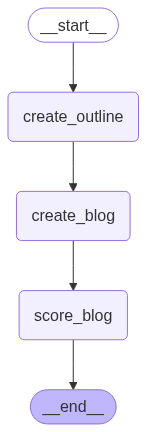

In [19]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
graph.add_node('score_blog',score_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'score_blog')
graph.add_edge('score_blog', END)

workflow = graph.compile()
workflow

In [20]:
initial_state = {'title': 'Rise of AI in India'}
final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': "I. Introduction\n    A. Introduce the topic of AI technology in India\n    B. Briefly explain the significance of AI in India's development\nII. History of AI in India\n    A. Overview of the growth and development of AI technology in India\n    B. Key milestones and achievements in the field of AI in India\nIII. Current state of AI in India\n    A. Discuss the current trends and advancements in AI technology in India\n    B. Highlight key industries and sectors that are utilizing AI in India\nIV. Impact of AI on Indian society and economy\n    A. Discuss the potential benefits and challenges of AI technology in India\n    B. Analyze the role of AI in shaping India's future economy and society\nV. Government initiatives and policies promoting AI in India\n    A. Overview of government programs and initiatives supporting AI development in India\n    B. Analysis of the impact of government policies on the growth of AI in India\nVI. Future pros

In [ ]:
print(final_state['outline'])

I. Introduction
    A. Brief overview of the increasing presence of artificial intelligence (AI) in India
    B. Why AI is becoming more prevalent in various industries in the country

II. Current Landscape of AI in India
    A. Statistics and data on the growth of AI technology in India
    B. Major companies and organizations leading the way in AI development
    C. Examples of AI applications in different sectors such as healthcare, finance, and education

III. Benefits of AI in India
    A. Improved efficiency and productivity
    B. Enhanced customer experiences
    C. Opportunities for job creation and growth in the tech industry

IV. Challenges and Concerns
    A. Ethical considerations surrounding AI development and implementation
    B. Potential job displacement and the need for upskilling the workforce
    C. Data privacy and security issues

V. Government Initiatives and Policies
    A. Overview of the Indian government's stance on AI technology
    B. Policies and regulati

In [8]:
print(final_state['content'])

Artificial intelligence (AI) is rapidly transforming various industries in India, playing a significant role in enhancing efficiency, productivity, and customer experiences. As the country continues to embrace AI technology, it is essential to understand the current landscape, benefits, challenges, and future outlook of AI in India.

The rise of AI in India has been fueled by advancements in technology, increased investment in research and development, and a growing demand for automation in various sectors. Companies and organizations in India are at the forefront of AI development, leveraging this technology to improve decision-making processes, streamline operations, and drive innovation.

AI applications in healthcare, finance, education, and other industries are revolutionizing the way businesses operate and deliver services to customers. From predictive analytics in healthcare to personalized recommendations in e-commerce, AI is transforming the way businesses engage with their au

In [21]:
print(final_state['score'])

9
